<a href="https://colab.research.google.com/github/suafle/minitarea4/blob/master/minitarea4_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CD2201: Ciencia de Datos en Astronomía**
**Profesores**: Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala




**Minitarea 4**: Uso de scikit-learn

**Objetivos:**

1.   Poner en práctica el uso de todas las librerías de python anteriormente vistas.
2.   Utilizar el paquete scikit-learn para regresión y clasificación.
3.   Medir el desempeño de los algoritmos a utilizar.

**Instrucciones:**

1.   Leer cuidadosamente lo que sigue.
2.   


##**1. Cargar datos**

Para esta minitarea trabajaremos con datos fotométricos de galaxias y estrellas. Esta tarea cuenta con dos objetivos: aplicar algoritmos de machine learning tanto en regresión como en clasificación, como evaluar el desempeño de los algoritmos a utilizar.

Comencemos por cargar los datos que han sido provistos a través de material docente (**datos_ml.csv**), el archivo debería estar en su Google Drive personal. Debemos montar nuestro Google Drive primero para luego acceder a los archivos en él. El archivo se puede abrir utilizando la función **read_csv** del paquete **pandas**.


Este archivo contiene fotometría en diferentes filtros (u,g,r,i,z), además de las clas







In [196]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [269]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels

In [270]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Matriz de confusion normalizada'
        else:
            title = 'Matriz de confusion, sin normalizacion'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusion normalizada")
    else:
        print('Matriz de confusion, sin normalizacion')

    print(cm)

    fig, ax = plt.subplots(figsize = (8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Etiqueta Real',
           xlabel='Etiqueta Predicha')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", fontsize=15)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), fontsize=25,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
            
    ax.grid(False)
    fig.tight_layout()
    return ax

In [214]:
datos = pd.read_csv('/content/drive/My Drive/datos_ml.csv')

In [199]:
df = datos[['u','g','r','i','z','class']]

In [201]:
df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

In [202]:
df_gal = df[df['class']=='GALAXY']
df_qso = df[df['class']=='QSO']

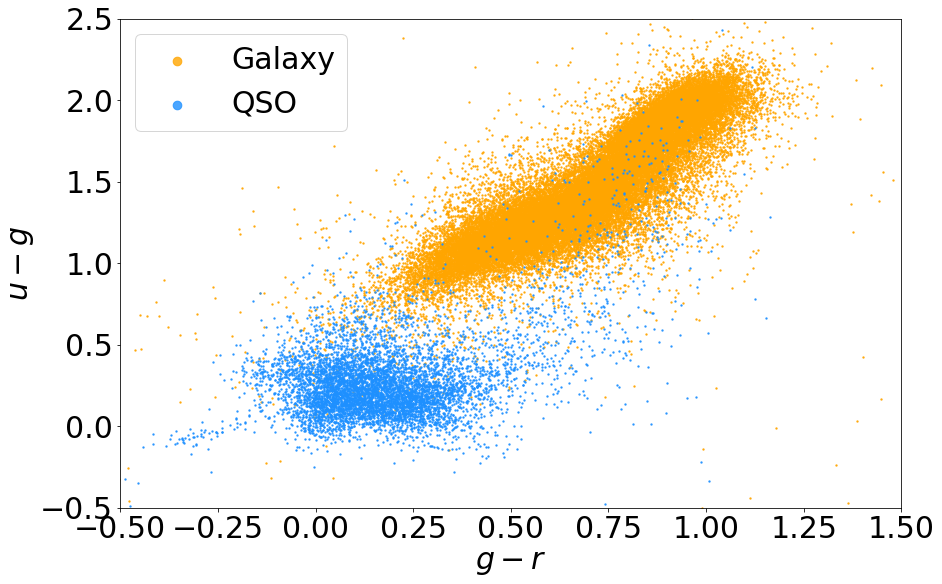

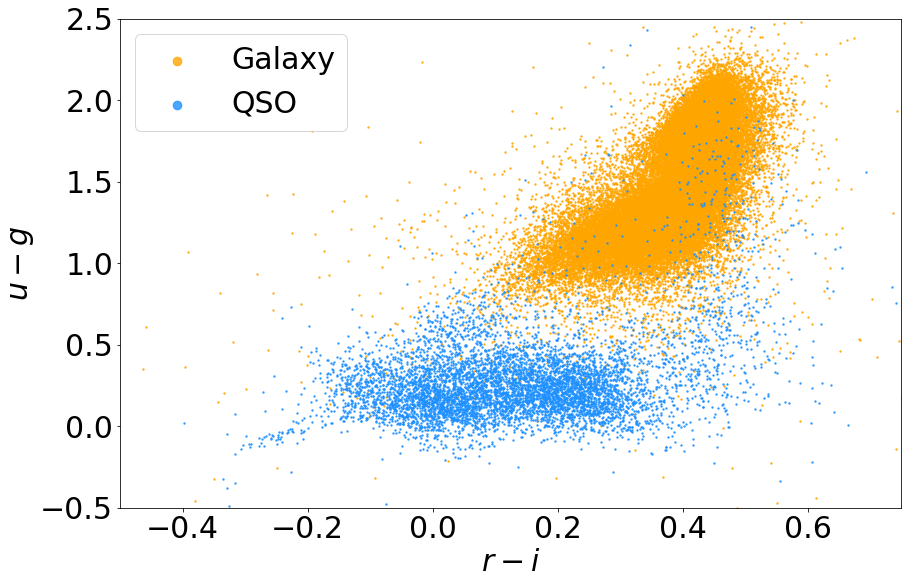

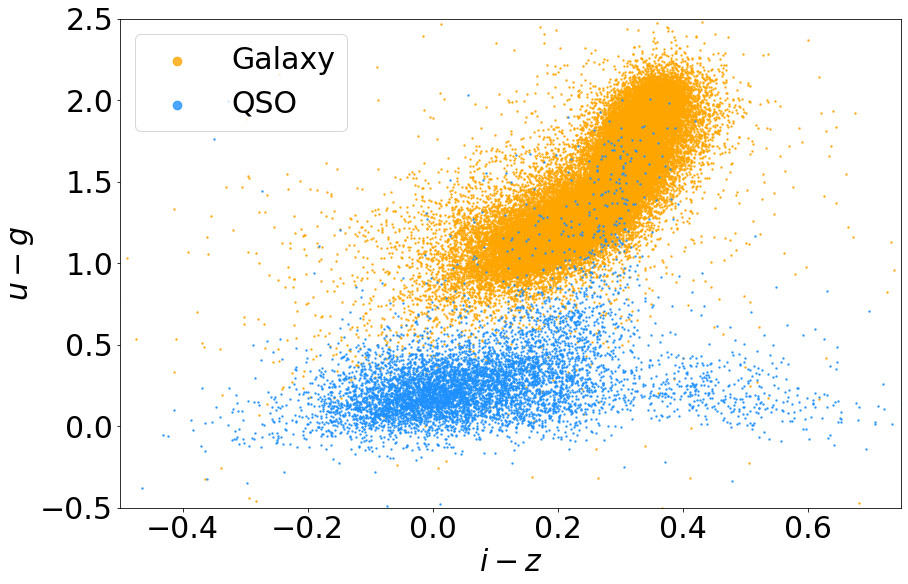

In [227]:
matplotlib.rcParams.update({'font.size': 30})

plt.figure(figsize=(14,9))
plt.scatter(df_gal['g-r'],df_gal['u-g'],color='orange',s=2,alpha=0.8,label='Galaxy')
plt.scatter(df_qso['g-r'],df_qso['u-g'],color='dodgerblue',s=2,alpha=0.8,label='QSO')
plt.ylabel('$u-g$')
plt.xlabel('$g-r$')
lgnd = plt.legend(loc=2)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,2.5])
plt.show()
plt.close()

plt.figure(figsize=(14,9))
plt.scatter(df_gal['r-i'],df_gal['u-g'],color='orange',s=2,alpha=0.8,label='Galaxy')
plt.scatter(df_qso['r-i'],df_qso['u-g'],color='dodgerblue',s=2,alpha=0.8,label='QSO')
plt.ylabel('$u-g$')
plt.xlabel('$r-i$')
lgnd = plt.legend(loc=2)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
plt.xlim([-0.5,0.75])
plt.ylim([-0.5,2.5])
plt.show()
plt.close()

plt.figure(figsize=(14,9))
plt.scatter(df_gal['i-z'],df_gal['u-g'],color='orange',s=2,alpha=0.8,label='Galaxy')
plt.scatter(df_qso['i-z'],df_qso['u-g'],color='dodgerblue',s=2,alpha=0.8,label='QSO')
plt.xlim([-0.5,0.75])
plt.ylim([-0.5,2.5])
lgnd = plt.legend(loc=2)
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
plt.ylabel('$u-g$')
plt.xlabel('$i-z$')
plt.show()
plt.close()



In [229]:
#Escoger un diagrama color-color y hacer clasificación
#En este caso (g-r,u-r)

mapa = {'GALAXY':0,'QSO':1}
df['clase'] = df['class'].map(mapa)
X = np.array(df[['u-g','g-r']])          # Arreglo con atributo
y = np.array(df[['clase']])              # Arreglo con resultados

In [233]:
rs = 1313   #Guardamos la semilla 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = rs) #Pimera division
svm_clf = svm.SVC(kernel='linear')

In [234]:
svm_clf.fit(train_X,train_y.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [237]:
pred_y = svm_clf.predict(test_X)

In [250]:
test_X[:,1]

array([ 0.33845, -0.05952,  0.59671, ...,  0.64987,  0.10149,  0.8154 ])

In [260]:
train_y.ravel()

array([0, 0, 0, ..., 0, 0, 0])

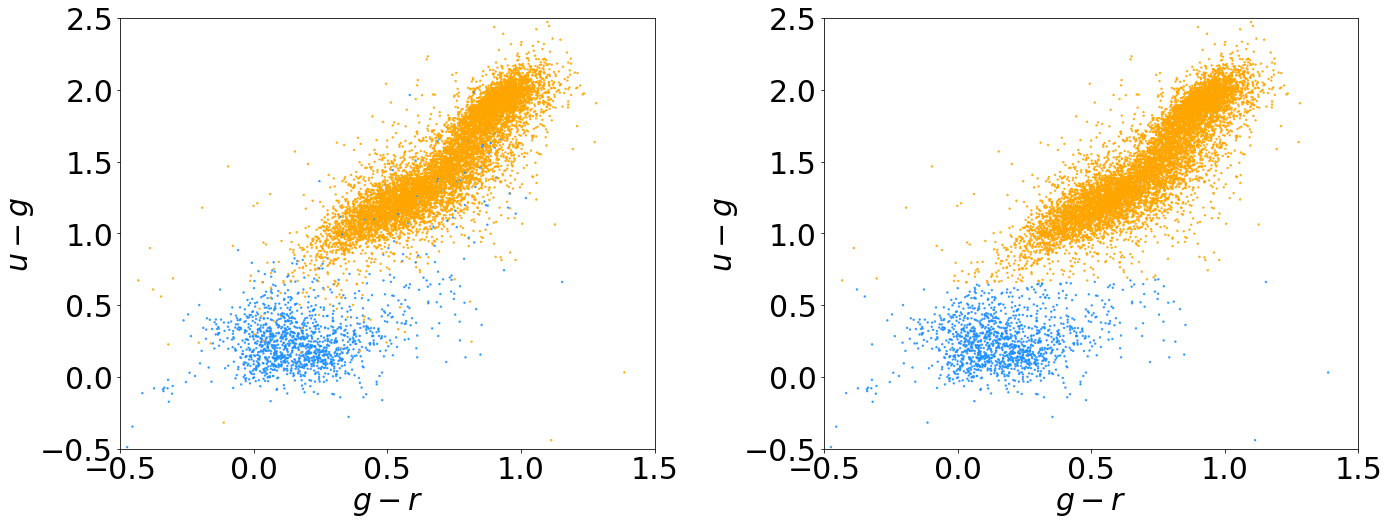

In [268]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

colormap = np.array(['orange', 'dodgerblue'])

categories = test_y.ravel()
ax[0].scatter(test_X[:,1],test_X[:,0],c=colormap[categories],s=2,alpha=0.8)#,label='Galaxy')
ax[0].set_xlim([-0.5,1.5])
ax[0].set_ylim([-0.5,2.5])
ax[0].set_ylabel('$u-g$')
ax[0].set_xlabel('$g-r$')

categories = pred_y.ravel()
ax[1].scatter(test_X[:,1],test_X[:,0],c=colormap[categories],s=2,alpha=0.8)#,label='Galaxy')
ax[1].set_xlim([-0.5,1.5])
ax[1].set_ylim([-0.5,2.5])
ax[1].set_ylabel('$u-g$')
ax[1].set_xlabel('$g-r$')

plt.tight_layout()
plt.show()
plt.close()

In [272]:
confusion_matrix(test_y, pred_y)

array([[8526,   64],
       [ 112, 1282]])

Matriz de confusion, sin normalizacion
[[8526   64]
 [ 112 1282]]
Matriz de confusion normalizada
[[0.99254948 0.00745052]
 [0.08034433 0.91965567]]


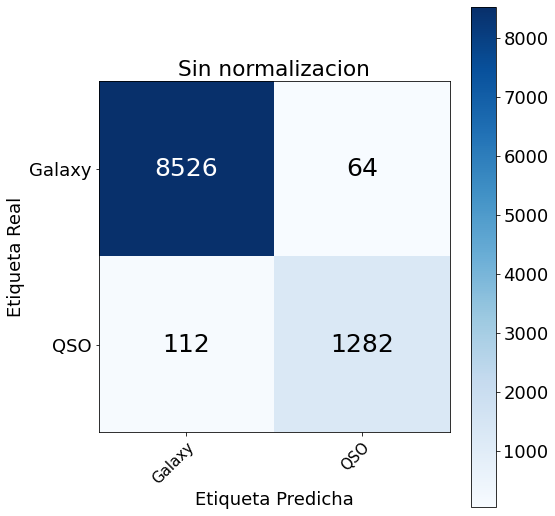

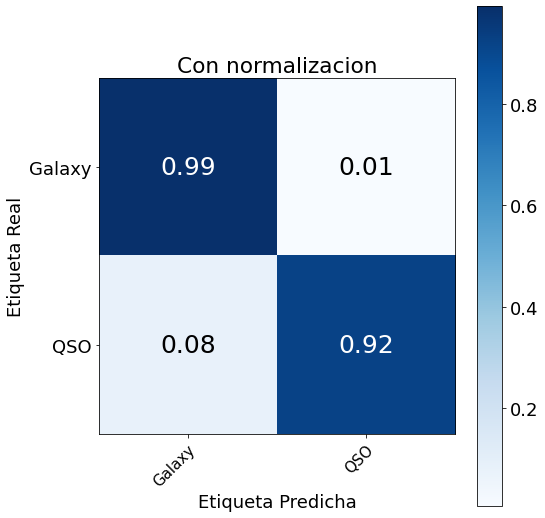

In [285]:
matplotlib.rcParams.update({'font.size': 18})

clases = np.array(['Galaxy','QSO'])
plot_confusion_matrix(test_y, pred_y, classes=clases, normalize = False, title='Sin normalizacion')
plot_confusion_matrix(test_y, pred_y, classes=clases, normalize = True, title='Con normalizacion')

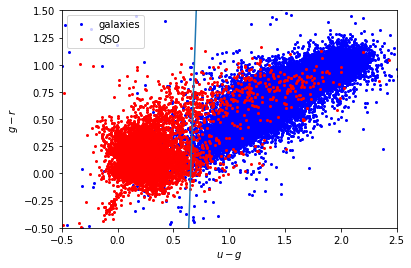

In [ ]:
x = np.arange(-0.5,2.5,0.001)
y = m*x - n

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.5, 1.5)
ax.plot(dfa['u-g'], dfa['g-r'], '.', ms=4, c='b', label='galaxies')
ax.plot(dfb['u-g'], dfb['g-r'], '.', ms=4, c='r', label='QSO')
ax.plot(x,y)
ax.legend(loc=2)
ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')
plt.show()
plt.close()

In [ ]:
svm_clf2 = svm.SVC(kernel="poly")


In [ ]:
X = np.array(df2[['u-g','g-r']])          # Arreglo con atributo
y = np.array(df2[['class2']])
svm_clf2.fit(X,y.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

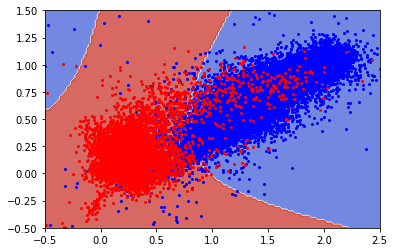

In [ ]:
Z = svm_clf2.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(dfa['u-g'], dfa['g-r'], '.', ms=4, c='b', label='galaxies')
plt.plot(dfb['u-g'], dfb['g-r'], '.', ms=4, c='r', label='QSO')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1.5)
plt.show()
plt.close()


In [ ]:
svm_clf3 = svm.SVC(kernel="poly",degree=2)

In [ ]:
X = np.array(df2[['u-g','g-r']])          # Arreglo con atributo
y = np.array(df2[['class2']])
svm_clf3.fit(X,y.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

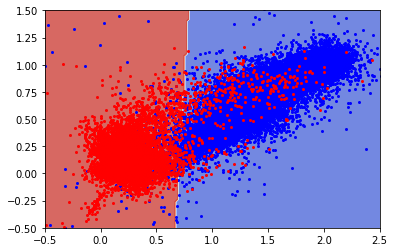

In [ ]:
Z = svm_clf3.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(dfa['u-g'], dfa['g-r'], '.', ms=4, c='b', label='galaxies')
plt.plot(dfb['u-g'], dfb['g-r'], '.', ms=4, c='r', label='QSO')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1.5)
plt.show()
plt.close()